# Proyek Analisis Data: E-Commerce Public Dataset (?)
- Nama: Budy Haryono
- Email: budypro423@gmail.com
- Id Dicoding: budy_haryono

## Menentukan Pertanyaan Bisnis

1.   Pada musim apa rental sepeda paling banyak dan paling sedikit?
2.   Pada rentang jam berapa sepeda paling banyak dan paling sedikit dirental?
3.   Pada kondisi cuaca seperti apa pengguna rental sepeda lebih suka merental sepeda?
4.   Bagaimana pengaruh temperatur terhadap kebiasaan pengguna jasa rental sepeda?
5.   Bagaimana performa bisnis jasa rental sepeda dalam beberapa bulan terakhir dilihat dari banyaknya pengguna?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Objektif:


*   Mengecek duplikasi pada dataset `day` dan `hour`
*   Mengecek missing value pada dataset `day` dan `hour`



In [4]:
day_df.info()
print("")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (to

Terlihat kolom `dteday` perlu diubah tipe datanya, begitupun dengan kolom dengan tipe data kategorikal

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


Tidak ditemukan indikasi adanya data duplikat pada kedua tabel

In [6]:
print(day_df.isnull().sum())
print("")
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Tidak ditemukan adanya indikasi *missing value*

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Objektif:
* Menghapus kolom yang tidak diperlukan
* Mengubah tipe data yang seharusnya data kategorik (awalnya integer): `season`,  `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`
* Mengubah tipe data kolom `dteday` dari `object` menjadi `datetime`
* Mengubah nama kolom agar *readable* atau mudah dibaca/dikenali
* Mengubah nilai kolom (poin 2) sesuai dengan nilai aslinya supaya lebih mudah dipahami
* Menambah kolom baru bernama `day_type` untuk membedakan hari kerja dan hari libur berdasarkan satu kolom saja kemudian menghapus kolom `holiday` dan `workingday`


#### Menghapus kolom

In [9]:
# kolom instant dihapus karena tidak memiliki hubungan spesifik dengan kolom lainnya
del hour_df['instant']
del day_df['instant']

#### Mengubah tipe data


##### `int` ke `category`

In [10]:
columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

##### `object` ke `datetime`

In [11]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

#### Mengubah nama kolom

In [12]:
# contoh kode di chatgpt
column_name_map = {
    'dteday': 'date',
    'hr': 'hour',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather',
    'temp': 'temperature',
    'atemp': 'feeling_temperature',
    'hum': 'humidity',
    'casual': 'casual_user',
    'registered': 'registered_user',
    'cnt': 'total_user',
}

# Menggunakan rename dengan kamus
day_df.rename(columns=column_name_map, inplace=True)
hour_df.rename(columns=column_name_map, inplace=True)

#### Mengubah nilai kolom

In [13]:
season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
year_map = {0: 2011, 1: 2012}
holiday_map = {0: False, 1: True}
weekday_map = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
workingday_map = {0: False, 1: True}
weather_map = {1: "Clear", 2: "Mist", 3: "Light Precipitation", 4: "Heavy Precipitation"}

day_df['season'] = day_df['season'].map(season_map)
day_df['year'] = day_df['year'].map(year_map)
day_df['holiday'] = day_df['holiday'].map(holiday_map)
day_df['weekday'] = day_df['weekday'].map(weekday_map)
day_df['workingday'] = day_df['workingday'].map(workingday_map)
day_df['weather'] = day_df['weather'].map(weather_map)
day_df['temperature'] = (day_df['temperature'] * 41).round(2)
day_df['feeling_temperature'] = (day_df['feeling_temperature'] * 50).round(2)
day_df['humidity'] = (day_df['humidity'] * 100).round(2)
day_df['windspeed'] = (day_df['windspeed'] * 67).round(2)

hour_df['season'] = hour_df['season'].map(season_map)
hour_df['year'] = hour_df['year'].map(year_map)
hour_df['holiday'] = hour_df['holiday'].map(holiday_map)
hour_df['weekday'] = hour_df['weekday'].map(weekday_map)
hour_df['workingday'] = hour_df['workingday'].map(workingday_map)
hour_df['weather'] = hour_df['weather'].map(weather_map)
hour_df['temperature'] = (hour_df['temperature'] * 41).round(2)
hour_df['feeling_temperature'] = (hour_df['feeling_temperature'] * 50).round(2)
hour_df['humidity'] = (hour_df['humidity'] * 100).round(2)
hour_df['windspeed'] = (hour_df['windspeed'] * 67).round(2)

#### Menambah kolom `day_type`

In [14]:
# day_type mengindikasikan hari tersebut apakah hari kerja atau hari libur (nasional maupun Sabtu/Minggu)
# lalu kolom holiday dan workingday dihapus
day_df['day_type'] = day_df['workingday'].apply(lambda x: 'Workday' if x == True else 'Holiday')
hour_df['day_type'] = hour_df['workingday'].apply(lambda x: 'Workday' if x == True else 'Holiday')
day_df['day_type'] =  day_df['day_type'].astype("category")
hour_df['day_type'] =  hour_df['day_type'].astype("category")
del hour_df['workingday']
del hour_df['holiday']
del day_df['workingday']
del day_df['holiday']

## Exploratory Data Analysis (EDA)

### Explore `day_df`



In [15]:
day_df.describe(include="all")

<ipython-input-15-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,date,season,year,month,weekday,weather,temperature,feeling_temperature,humidity,windspeed,casual_user,registered_user,total_user,day_type
count,731,731,731.0,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,731,4,2.0,12.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,2011-01-01 00:00:00,Fall,2012.0,1.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Workday
freq,1,188,366.0,62.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,20.310821,23.717784,62.789357,12.762654,848.176471,3656.172367,4504.348837,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,7.505177,8.148006,14.242923,5.192157,686.622488,1560.256377,1937.211452,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,2.420000,3.950000,0.000000,1.500000,2.000000,20.000000,22.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,13.820000,16.895000,52.000000,9.040000,315.500000,2497.000000,3152.000000,NaN


Berdasarkan pertanyaan bisnis yang telah didefinisikan, maka kolom `weather` dan `total_user` akan dianalisis dan dieksplor.

In [16]:
day_df.groupby(by="season").total_user.sum().sort_values(ascending=False)

season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: total_user, dtype: int64

Berdasarkan pivot tabel antara musim dan jumlah pengguna, dapat diperoleh informasi yaitu musim dengan jasa rental sepeda terbanyak berada pada musim **gugur/*fall*** dengan pengguna sebanyak **1.061.129 orang**. Selain itu, pengguna jasa rental sepeda paling sedikit berada pada musim **semi/*spring*** dengan pengguna sebanyak **471.348 orang**.

In [17]:
result_df = day_df.groupby(by="year").agg({
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": "sum"
})

# Menambahkan total keseluruhan
total_overall = pd.DataFrame(result_df.sum()).transpose()
total_overall = total_overall.rename(index={0: 'Total'})
result_df = pd.concat([result_df, total_overall])

# Menampilkan DataFrame hasil
result_df

,casual_user,registered_user,total_user
2011,247252,995851,1243103
2012,372765,1676811,2049576
Total,620017,2672662,3292679


Berdasarkan pivot tabel antara tahun dengan jumlah pengguna, ada 3 informasi yang dapat diperoleh, yaitu pengguna casual, pengguna yang terdaftar, dan total pengguna rental sepeda. Dimulai dari pengguna casual, diketahui pengguna sebanyak sebanyak **620.017** orang. Selanjutnya, user yang terdaftar ada sebanyak **2.672.662** orang. Sedangkan total pengguna yang tercatat ada sebanyak **3.292.679** orang.

### Explore `hour_df`

In [18]:
hour_df.describe(include="all")

<ipython-input-18-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,date,season,year,month,hour,weekday,weather,temperature,feeling_temperature,humidity,windspeed,casual_user,registered_user,total_user,day_type
count,17379,17379,17379.0,17379.0,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,731,4,2.0,12.0,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,2011-01-01 00:00:00,Fall,2012.0,5.0,NaN,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Workday
freq,24,4496,8734.0,1488.0,NaN,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11865
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,20.376474,23.788484,62.722884,12.736233,35.676218,153.786869,189.463088,NaN
std,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,7.894801,8.592587,19.292983,8.196891,49.305030,151.357286,181.387599,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,13.940000,16.660000,48.000000,7.000000,4.000000,34.000000,40.000000,NaN


Berdasarkan pertanyaan bisnis yang telah didefinisikan, maka kolom `hour`, `temperature`, dan `weather` akan dianalisis dan dieksplor.

In [19]:
# groupby pertanyaan 2 jam
hour_df.groupby(by="hour").total_user.sum().sort_values(ascending=False)

hour
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: total_user, dtype: int64

Berdasarkan pivot di atas, dapat diketahui pengguna rental sepeda paling banyak menyewa pada jam 17.00 - 17.59 sedangkan paling sedikit menyewa pada jam 04.00 - 04.59.

In [20]:
# groupby pertanyaan 3 cuaca
hour_df.groupby(by="weather").total_user.sum()

weather
Clear                  2338173
Mist                    795952
Light Precipitation     158331
Heavy Precipitation        223
Name: total_user, dtype: int64

Berdasarkan pivot di atas, dapat diketahui bahwa rental sepeda paling banyak dilakukan saat cuaca cerah/*clear* diikuti dengan cuaca berkabut/*mist*. Sedangkan rental cuaca saat hujan/salju besar maupun kecil terpaut jauh dari segi pengguna.

In [21]:
# groupby pertanyaan 4 temperature
# Temperature dikelompokkan menjadi Cold, Warm, dan Hot
hour_df["temp_group"] = hour_df.temperature.apply(lambda x: "Cold" if x < 10 else ("Hot" if x > 25 else "Warm"))
hour_df.groupby(by="temp_group").total_user.sum().sort_values(ascending=False)

temp_group
Warm    1584124
Hot     1567654
Cold     140901
Name: total_user, dtype: int64

Berdasarkan pivot di atas, dapat diketahui bahwa pengguna rental sepeda lebih suka melakukan rental sepeda pada cuaca **hangat/*warm*** dan **panas/*hot***.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa rental sepeda paling banyak dan paling sedikit?

In [22]:
# membuat dataframe baru yang berisi hanya data yang dibutuhkan
user_sum_per_season_df = day_df.groupby("season").total_user.sum().reset_index()

user_sum_per_season_df

,season,total_user
0,Spring,471348
1,Summer,918589
2,Fall,1061129
3,Winter,841613


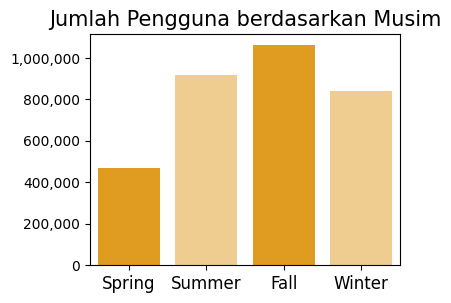

In [23]:
# define objek grafik
plt.figure(figsize=(4, 3))

# define data terkait ke grafik batang
ax = sns.barplot(
    y="total_user",
    x="season",
    data=user_sum_per_season_df.sort_values(by="total_user"),
    color="#ffd080"
)

# mencari record dengan jumlah pengguna tertinggi
max_index = user_sum_per_season_df['total_user'].idxmax()
min_index = user_sum_per_season_df['total_user'].idxmin()

# atur warna bar tertinggi menjadi berbeda
ax.patches[max_index].set_facecolor('#df9c20')
ax.patches[min_index].set_facecolor('#df9c20')

# format titik pada angka ribuan
ax.yaxis.set_major_formatter('{x:,.0f}')

# pembentukan visual grafik
plt.title("Jumlah Pengguna berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan grafik di atas, dapat dilihat bahwa pengguna rental sepeda paling banyak merental pada musim gugur/*fall* dengan total perentalan sebanyak 1.061.129 kali. Kontras dengan hal tersebut. pengguna rental sepeda paling sedikit merental pada musim semi/*spring* dengan total perentalan sebanyak 471.348 kali,

### Pertanyaan 2: Pada rentang jam berapa sepeda paling banyak dan paling sedikit dirental?

In [24]:
# membuat dataframe baru yang berisi hanya data yang dibutuhkan
user_sum_per_hour_df = hour_df.groupby("hour").total_user.sum().sort_values(ascending=False).reset_index()

# kolom hour diubah jadi string supaya grafiknya tidak otomotis urut berdasarkan hour
user_sum_per_hour_df["hour"] = user_sum_per_hour_df["hour"].astype(str)

print(user_sum_per_hour_df.head(7))
print(user_sum_per_hour_df.tail(7))

  hour  total_user
0   17      336860
1   18      309772
2    8      261001
3   16      227748
4   19      226789
5   13      184919
6   12      184414
   hour  total_user
17    6       55132
18    0       39130
19    1       24164
20    2       16352
21    5       14261
22    3        8174
23    4        4428


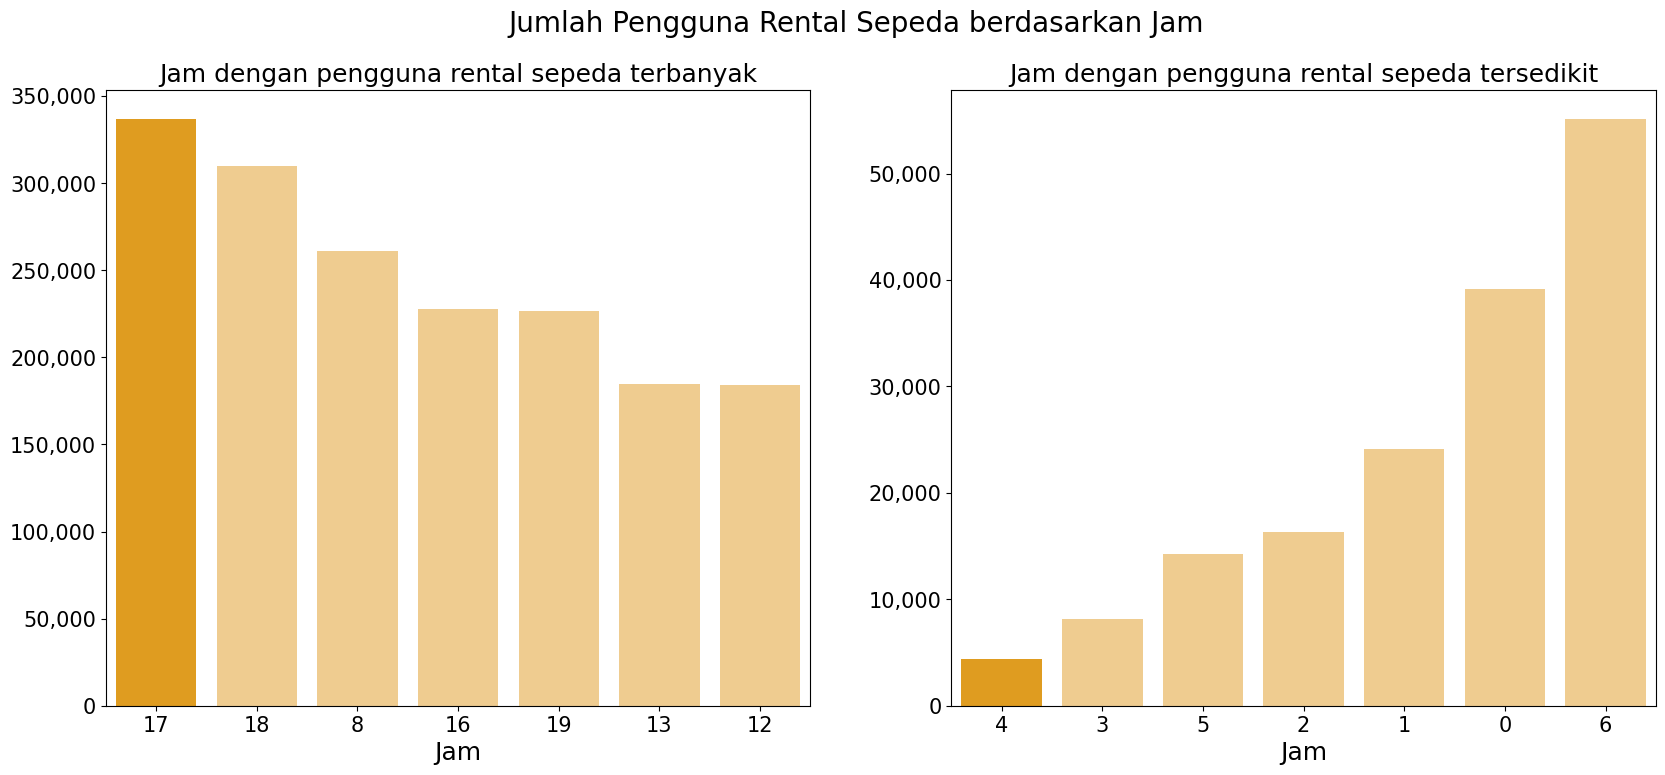

In [35]:
# define objek grafik
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# grafik 1: jam dengan pengguna rental sepeda terbanyak
sns.barplot(x="hour", y="total_user", data=user_sum_per_hour_df.head(7), color="#ffd080", ax=ax[0])

# setting grafik 1
ax[0].set_ylabel(None)
ax[0].set_xlabel("Jam", fontsize=18)
ax[0].set_title("Jam dengan pengguna rental sepeda terbanyak", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].tick_params(axis='x', labelsize=15)

# mencari record dengan jumlah pengguna tertinggi
max_index = user_sum_per_hour_df['total_user'].head(7).idxmax()

# atur warna bar tertinggi menjadi berbeda
ax[0].patches[max_index].set_facecolor('#df9c20')

# format titik pada angka ribuan
ax[0].yaxis.set_major_formatter('{x:,.0f}')

# grafik 2: jam dengan pengguna rental tersedikit
sns.barplot(x="hour", y="total_user", data=user_sum_per_hour_df.sort_values(by="total_user", ascending=True).head(7), color="#ffd080", ax=ax[1])

# setting grafik 2
ax[1].set_ylabel(None)
ax[1].set_xlabel("Jam",  fontsize=18)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_left()
ax[1].set_title("Jam dengan pengguna rental sepeda tersedikit", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].tick_params(axis='x', labelsize=15)

# mencari record dengan jumlah pengguna terendah
inversed_df = hour_df.groupby("hour").total_user.sum().sort_values(ascending=True).reset_index()
min_index = inversed_df['total_user'].head(7).idxmin()

# atur warna bar tertinggi menjadi berbeda
ax[1].patches[min_index].set_facecolor('#df9c20')

# format titik pada angka ribuan
ax[1].yaxis.set_major_formatter('{x:,.0f}')

# menampilkan plot
plt.suptitle("Jumlah Pengguna Rental Sepeda berdasarkan Jam", fontsize=20)
plt.show()

Berdasarkan grafik di atas, dapat dilihat bahwa pengguna rental sepeda paling banyak merental pada pukul 17 sore hari dengan rental sebanyak 336.860 kali diikuti dengan rentang waktu pagi pukul 8, siang pukul 12-13, dan sore-malam pukul 16-19. Kontras dengan hal tersebut, pukul 4 merupakan waktu dengan pengguna rental sepeda paling sedikit dengan rental sebanyak 4.428 kali diikuti dengan rentang waktu dini hari hingga menjelang pagi pukul 0-6.

### Pertanyaan 3: Pada kondisi cuaca seperti apa pengguna rental sepeda lebih suka merental sepeda?

In [26]:
# membuat dataframe baru yang berisi hanya data yang dibutuhkan
user_sum_per_weather_df = hour_df.groupby("weather").total_user.sum().reset_index()

user_sum_per_weather_df

,weather,total_user
0,Clear,2338173
1,Mist,795952
2,Light Precipitation,158331
3,Heavy Precipitation,223


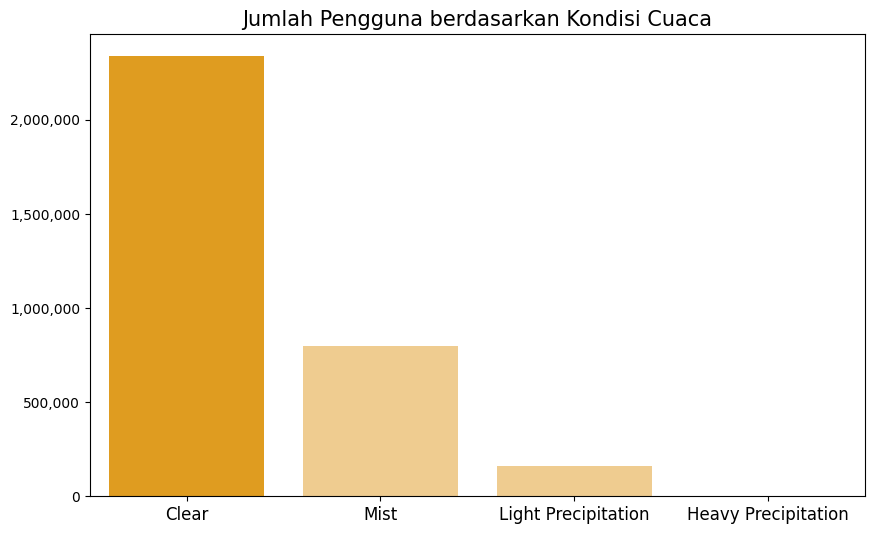

In [27]:
# define objek grafik
plt.figure(figsize=(10, 6))

# define data terkait ke grafik batang
ax = sns.barplot(
    y="total_user",
    x="weather",
    data=user_sum_per_weather_df.sort_values(by="total_user"),
    color="#ffd080"
)

# mencari record dengan jumlah pengguna tertinggi
max_index = user_sum_per_weather_df['total_user'].idxmax()

# atur warna bar tertinggi menjadi berbeda
ax.patches[max_index].set_facecolor('#df9c20')

# format titik pada angka ribuan
ax.yaxis.set_major_formatter('{x:,.0f}')

# pembentukan visual grafik
plt.title("Jumlah Pengguna berdasarkan Kondisi Cuaca", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan grafik di atas, dapat dilihat bahwa pengguna rental sepeda lebih suka merental sepeda pada kondisi cuaca cerah/*clear* dengan total perentalan sebanyak 2.338.173 kali. Sedangkan pengguna/pelanggan rental sepeda lebih sedikit merental pada cuaca hujan/bersalju baik yang ringan maupun lebat.

### Pertanyaan 4: Bagaimana pengaruh temperatur terhadap kebiasaan pengguna jasa rental sepeda?

In [28]:
# membuat dataframe baru yang berisi hanya data yang dibutuhkan
user_sum_per_temperature_df = hour_df.groupby("temp_group").total_user.sum().reset_index()

user_sum_per_temperature_df

,temp_group,total_user
0,Cold,140901
1,Hot,1567654
2,Warm,1584124


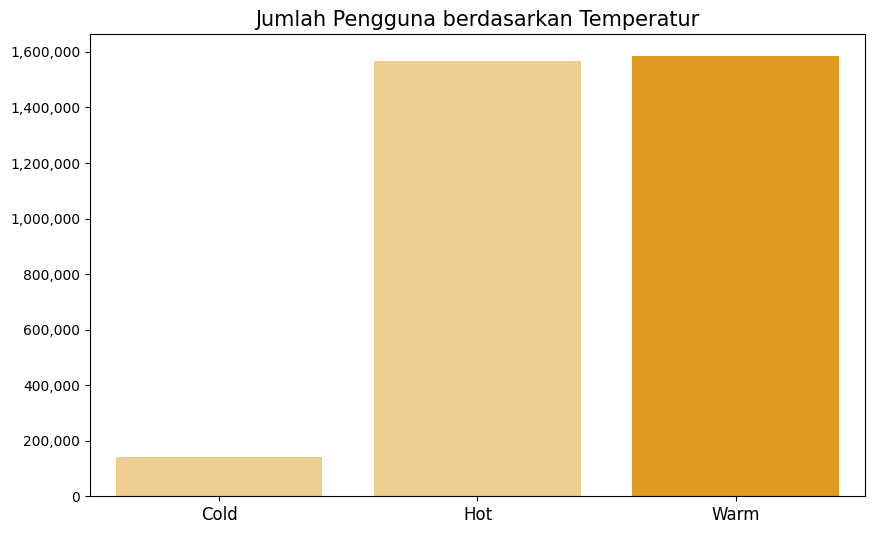

In [29]:
# define objek grafik
plt.figure(figsize=(10, 6))

# define data terkait ke grafik batang
ax = sns.barplot(
    y="total_user",
    x="temp_group",
    data=user_sum_per_temperature_df.sort_values(by="total_user"),
    color="#ffd080"
)

# mencari record dengan jumlah pengguna tertinggi
max_index = user_sum_per_temperature_df['total_user'].idxmax()

# atur warna bar tertinggi menjadi berbeda
ax.patches[max_index].set_facecolor('#df9c20')

# format titik pada angka ribuan
ax.yaxis.set_major_formatter('{x:,.0f}')

# pembentukan visual grafik
plt.title("Jumlah Pengguna berdasarkan Temperatur", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan grafik di atas, dapat terlihat bahwa kondisi temperatur berpangaruh terhadap kebiasaan merental sepeda di mana kondisi temperatur hangat/*warm* dan panas/*hot* lebih disukai dengan angka perentalan yang tidak jauh, yaitu sebanyak 1.584.124 kali dan 1.567.654 kali.

### Pertanyaan 5: Bagaimana performa bisnis jasa rental sepeda dalam beberapa bulan terakhir dilihat dari banyaknya pengguna?

In [30]:
# membuat dataframe baru yang berisi hanya data yang dibutuhkan
monthly_user_df = day_df.resample(rule='M', on='date').total_user.sum()
monthly_user_df.index = monthly_user_df.index.strftime('%b-%y') #mengubah format order date menjadi nama bulan

monthly_user_df = monthly_user_df.reset_index()

monthly_user_df.head()

,date,total_user
0,Jan-11,38189
1,Feb-11,48215
2,Mar-11,64045
3,Apr-11,94870
4,May-11,135821


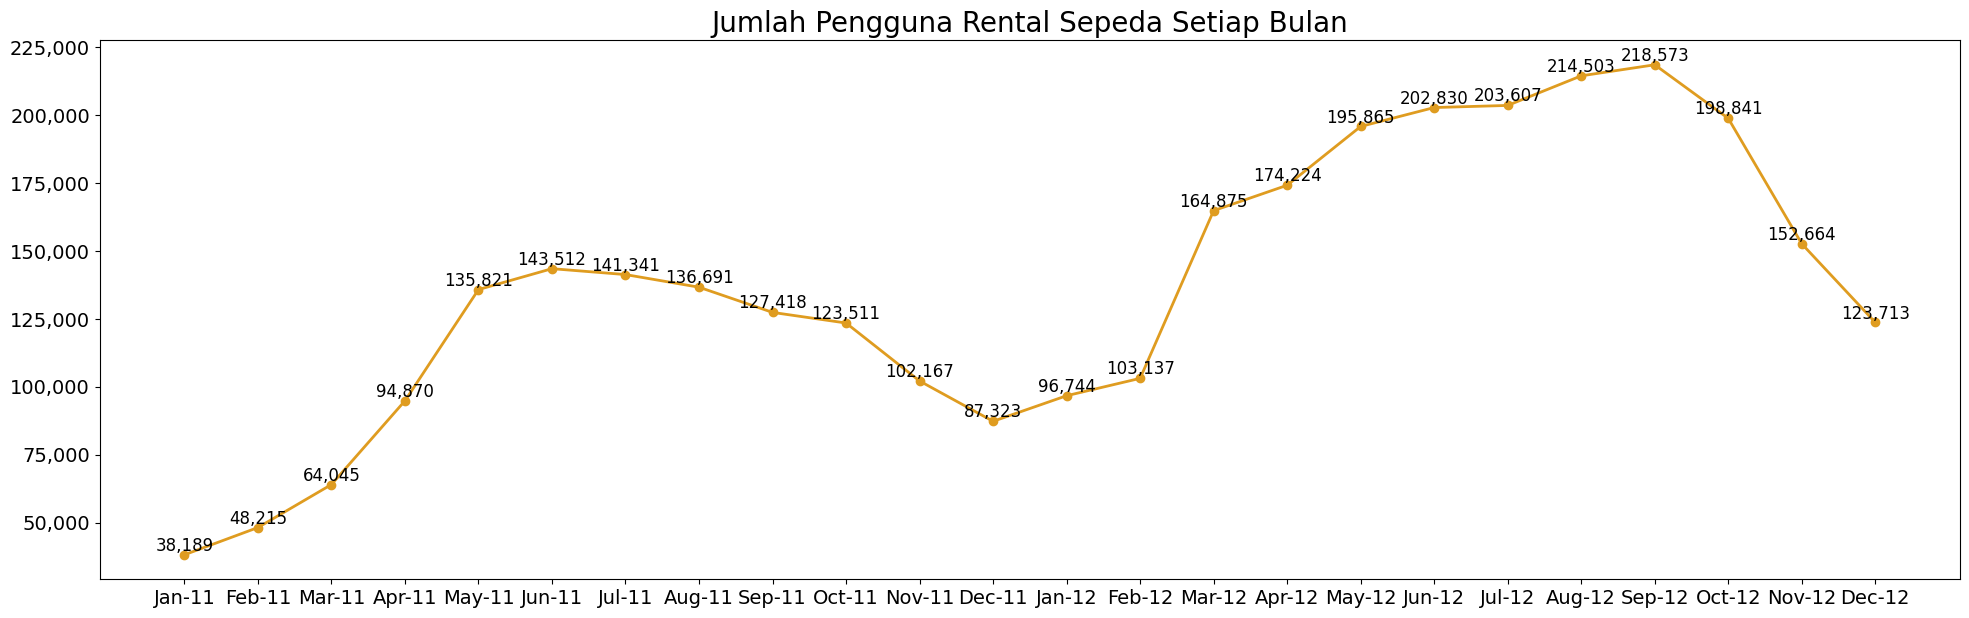

In [31]:
# define objek grafik
plt.figure(figsize=(24, 7))

# define data terkait ke grafik
plt.plot(
    monthly_user_df["date"],
    monthly_user_df["total_user"],
    marker='o',
    linewidth=2,
    color="#df9c20"
)

for i, txt in enumerate(monthly_user_df['total_user']):
    plt.text(monthly_user_df['date'][i], txt, f"{txt:,.0f}", ha='center', va='bottom', fontsize=12)

# setting elemen visual grafik
plt.title("Jumlah Pengguna Rental Sepeda Setiap Bulan", loc="center", fontsize=20)
plt.gca().yaxis.set_major_formatter('{x:,.0f}')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Dari grafik pengguna jasa rental sepeda per bulan di atas, dapat terlihat bahwa pengguna jasa rental sepeda sempat meningkat drastis pada bulan April hingga Mei pada tahun 2011 sebelum akhirnya perlahan menurun hingga akhir tahun. Lalu pada tahun 2012, pengguna jasa rental sepeda kembali meningkat pada awal dua bulan kemudian meningkat drastis pada bulan Maret 2012 lalu meningkat terus sampai bulan September 2012. Penurunan pengguna jasa rental sepeda yang lumayan signifikan justru terjadi pada kuartal terakhir tahun 2012. Untuk itu, perlu adanya mitigasi atau perencanaan untuk menangani penurunan pengguna yang bisa berefek pada adanya penurunan revenue yang diterima.

## Conclusion

Pertanyaan Bisnis:
1.   Pada musim apa rental sepeda paling banyak dan paling sedikit?
2.   Pada rentang jam berapa sepeda paling banyak dan paling sedikit dirental?
3.   Pada kondisi cuaca seperti apa pengguna rental sepeda lebih suka merental sepeda?
4.   Bagaimana pengaruh temperatur terhadap kebiasaan pengguna jasa rental sepeda?
5.   Bagaimana performa bisnis jasa rental sepeda dalam beberapa bulan terakhir dilihat dari banyaknya pengguna?

Jawaban:
1. Berdasarkan musim dilihat dari sisi pengguna, pengguna rental sepeda paling banyak merental pada musim gugur/*fall*, sedangkan pengguna rental sepeda paling sedikit merental pada musim semi/*spring*.
2. Berdasarkan jam perentalan sepeda dilihat dari sisi pengguna, pengguna rental sepeda paling banyak merental pada jam 17 sore hari dengan rental sebanyak 336.860 kali diikuti dengan rentang waktu pagi jam 8, siang jam 12-13, dan sore-malam jam 16-19. Sedangkan pengguna rental sepeda paling sedikit merental pada jam 4 diikuti dengan rentang waktu dini hari hingga menjelang pagi pada jam 0-6.
3. Berdasarkan kondisi cuaca, pengguna rental sepeda lebih suka merental sepeda pada kondisi cuaca cerah/*clear*. Sedangkan pengguna/pelanggan rental sepeda lebih sedikit merental pada cuaca hujan/bersalju baik yang ringan maupun lebat.
4. Kondisi temperatur berpengaruh terhadap kebiasaan merental sepeda di mana kondisi temperatur hangat/*warm* dan panas/*hot* lebih disukai dibandingkan dengan temperatur dingin/*cold*.
5. Berdasarkan grafik pengguna per bulan, terdapat adanya kecenderungan kenaikan dan penurunan yang cukup fluktuatif di mana kenaikan perlahan terjadi pada kuartal pertama diikuti dengan kenaikan yang signifikan pada kuartal kedua serta adanya penurunan pada akhir tahun atau kuartal keempat. Maka dari itu, perlu adanya analisis lebih lanjut untuk mengetahui faktor-faktor yang mempengaruhi ketertarikan pengguna dalam merental sepeda.

## Clean Dataset

In [32]:
day_df.to_csv("day_clean.csv", index=False)
hour_df.to_csv("hour_clean.csv", index=False)